In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Часть А

## Синусоидальный сигнал

In [186]:
n = np.arange(1, 8) #от 1 до 7

v_1 = np.array([3.9, 7.8, 11.7, 15.7, 19.6, 23.5, 27.5]) #согласованная линия
v_2 = np.array([4, 8, 12, 16, 20, 24, 28]) #без нагрузки

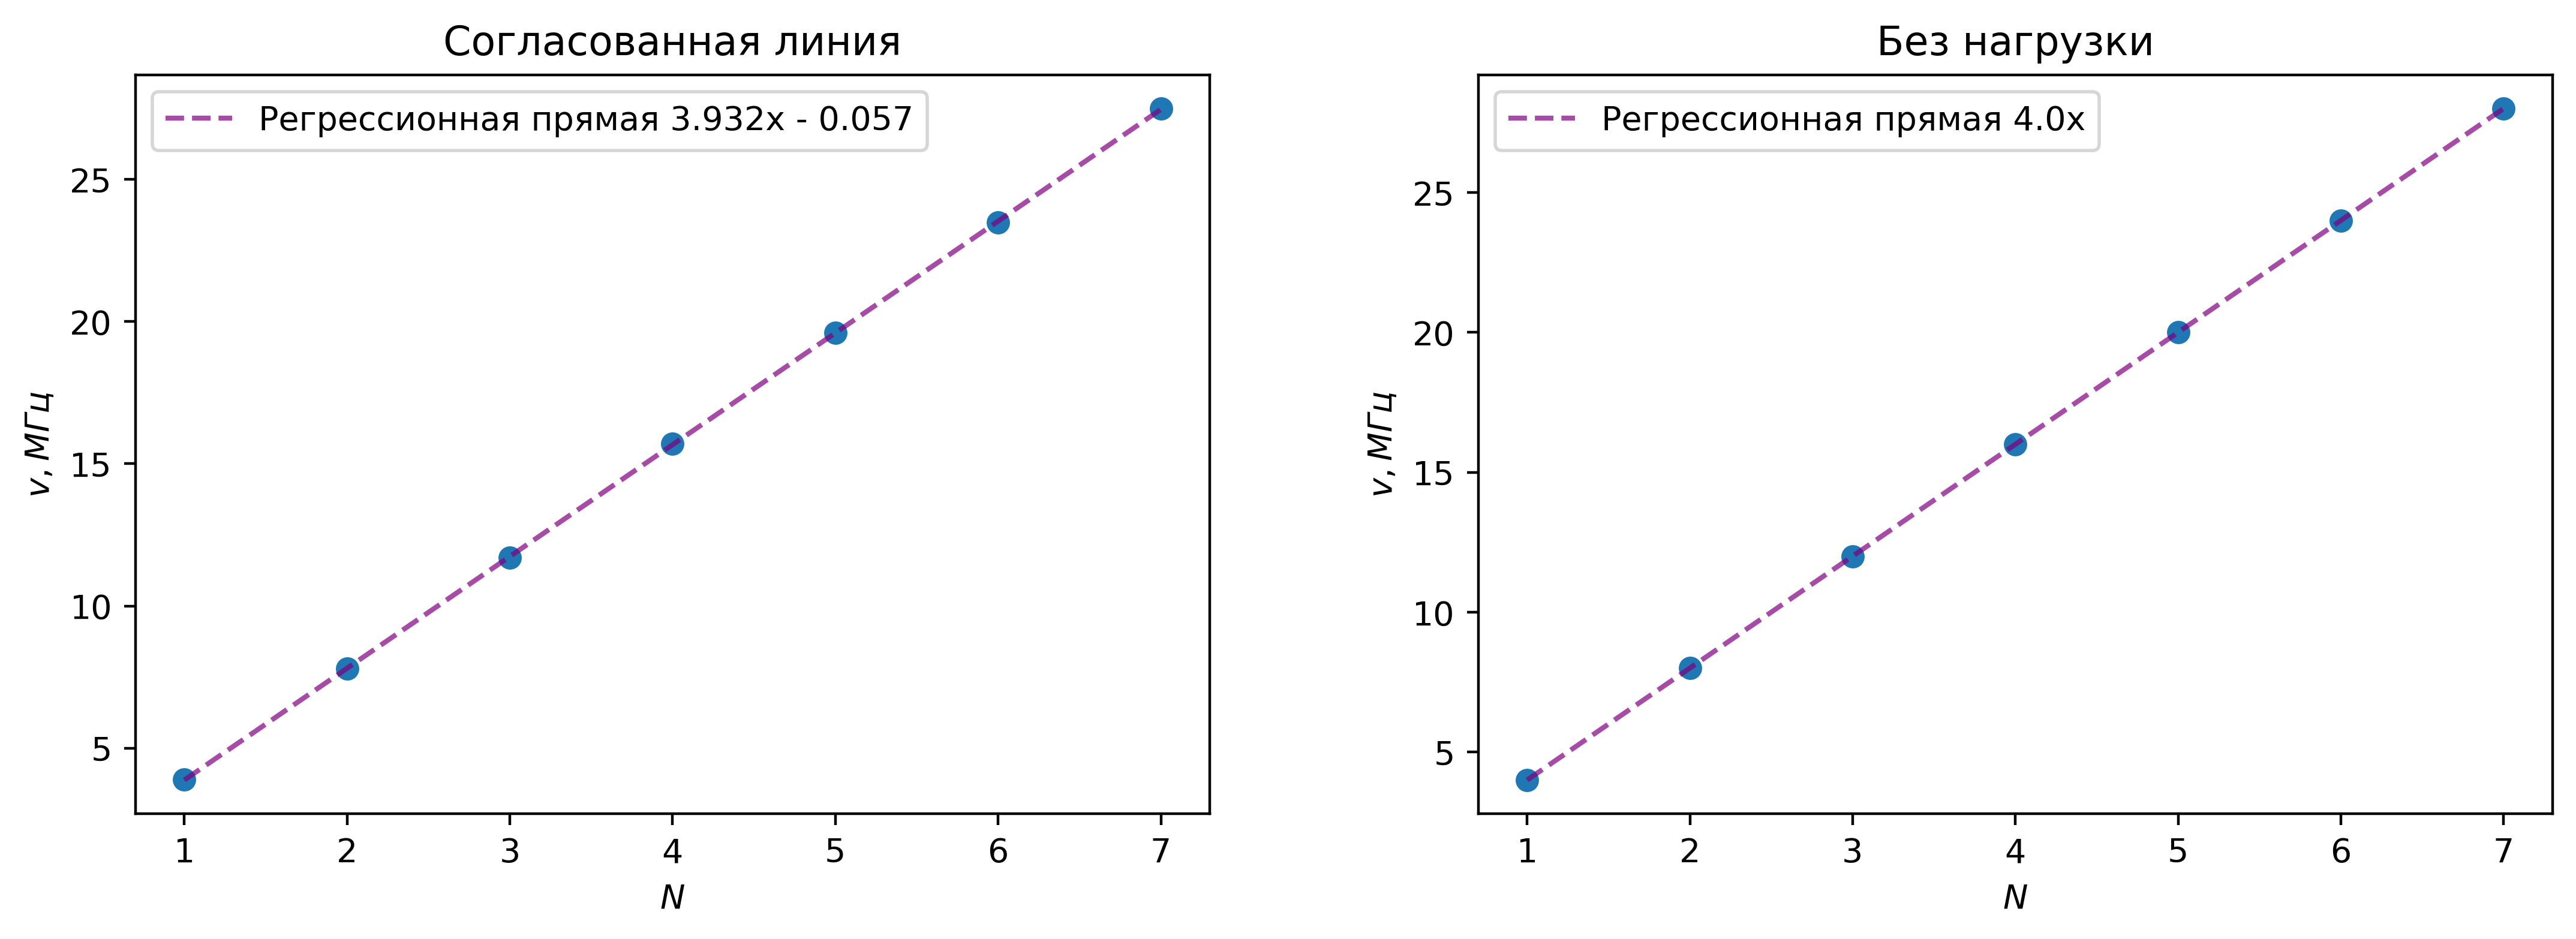

In [187]:
# Создать фигуру и подграфы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), dpi=400)



# построим левый график и пропишем регрессионную прямую с выводом ее формулы на легенду
ax1.scatter(n, v_1)
ax1.set_title('Согласованная линия')

#построим регрессию методом МНК слева
A = np.column_stack((n, np.ones(len(n))))
coefficients, _, _, _ = np.linalg.lstsq(A, v_1, rcond=None)
a, b = coefficients
k1, k2 = a, b
ax1.plot([n.min(), n.max()], [n.min()*a+b, n.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x - {abs(round(b, 3))}')



# построим также правый график
ax2.scatter(n, v_2)
ax2.set_title('Без нагрузки')

#построим регрессию методом МНК справа
A = np.column_stack((n, np.ones(len(n))))
coefficients, _, _, _ = np.linalg.lstsq(A, v_2, rcond=None)
a, b = coefficients
ax2.plot([n.min(), n.max()], [n.min()*a+b, n.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x')



#побольше отступы сделать между ними
fig.subplots_adjust(wspace=0.25)

# Отобразить графики и применим настройки 
ax1.set_xlabel('$N$')
ax1.set_ylabel('$v, МГц$')
ax2.set_xlabel('$N$')
ax2.set_ylabel('$v, МГц$')

ax1.legend()
ax2.legend()

fig.savefig('plot/fig1.png', bbox_inches='tight')

In [188]:
#посчитаем среднеквадратичную ошибку

v_pred = n*k1 + k2
Delta = (v_1 - v_pred)

Delta.std()

0.027664166758623956

## Прямоугольный сигнал

In [189]:
n = np.arange(1, 6) #от 1 до 5

v_1 = np.array([3.92, 7.82, 11.74, 15.65, 19.59]) #согласованная линия
v_2 = np.array([3.9, 7.8, 11.7, 15.7, 19.5]) #без нагрузки

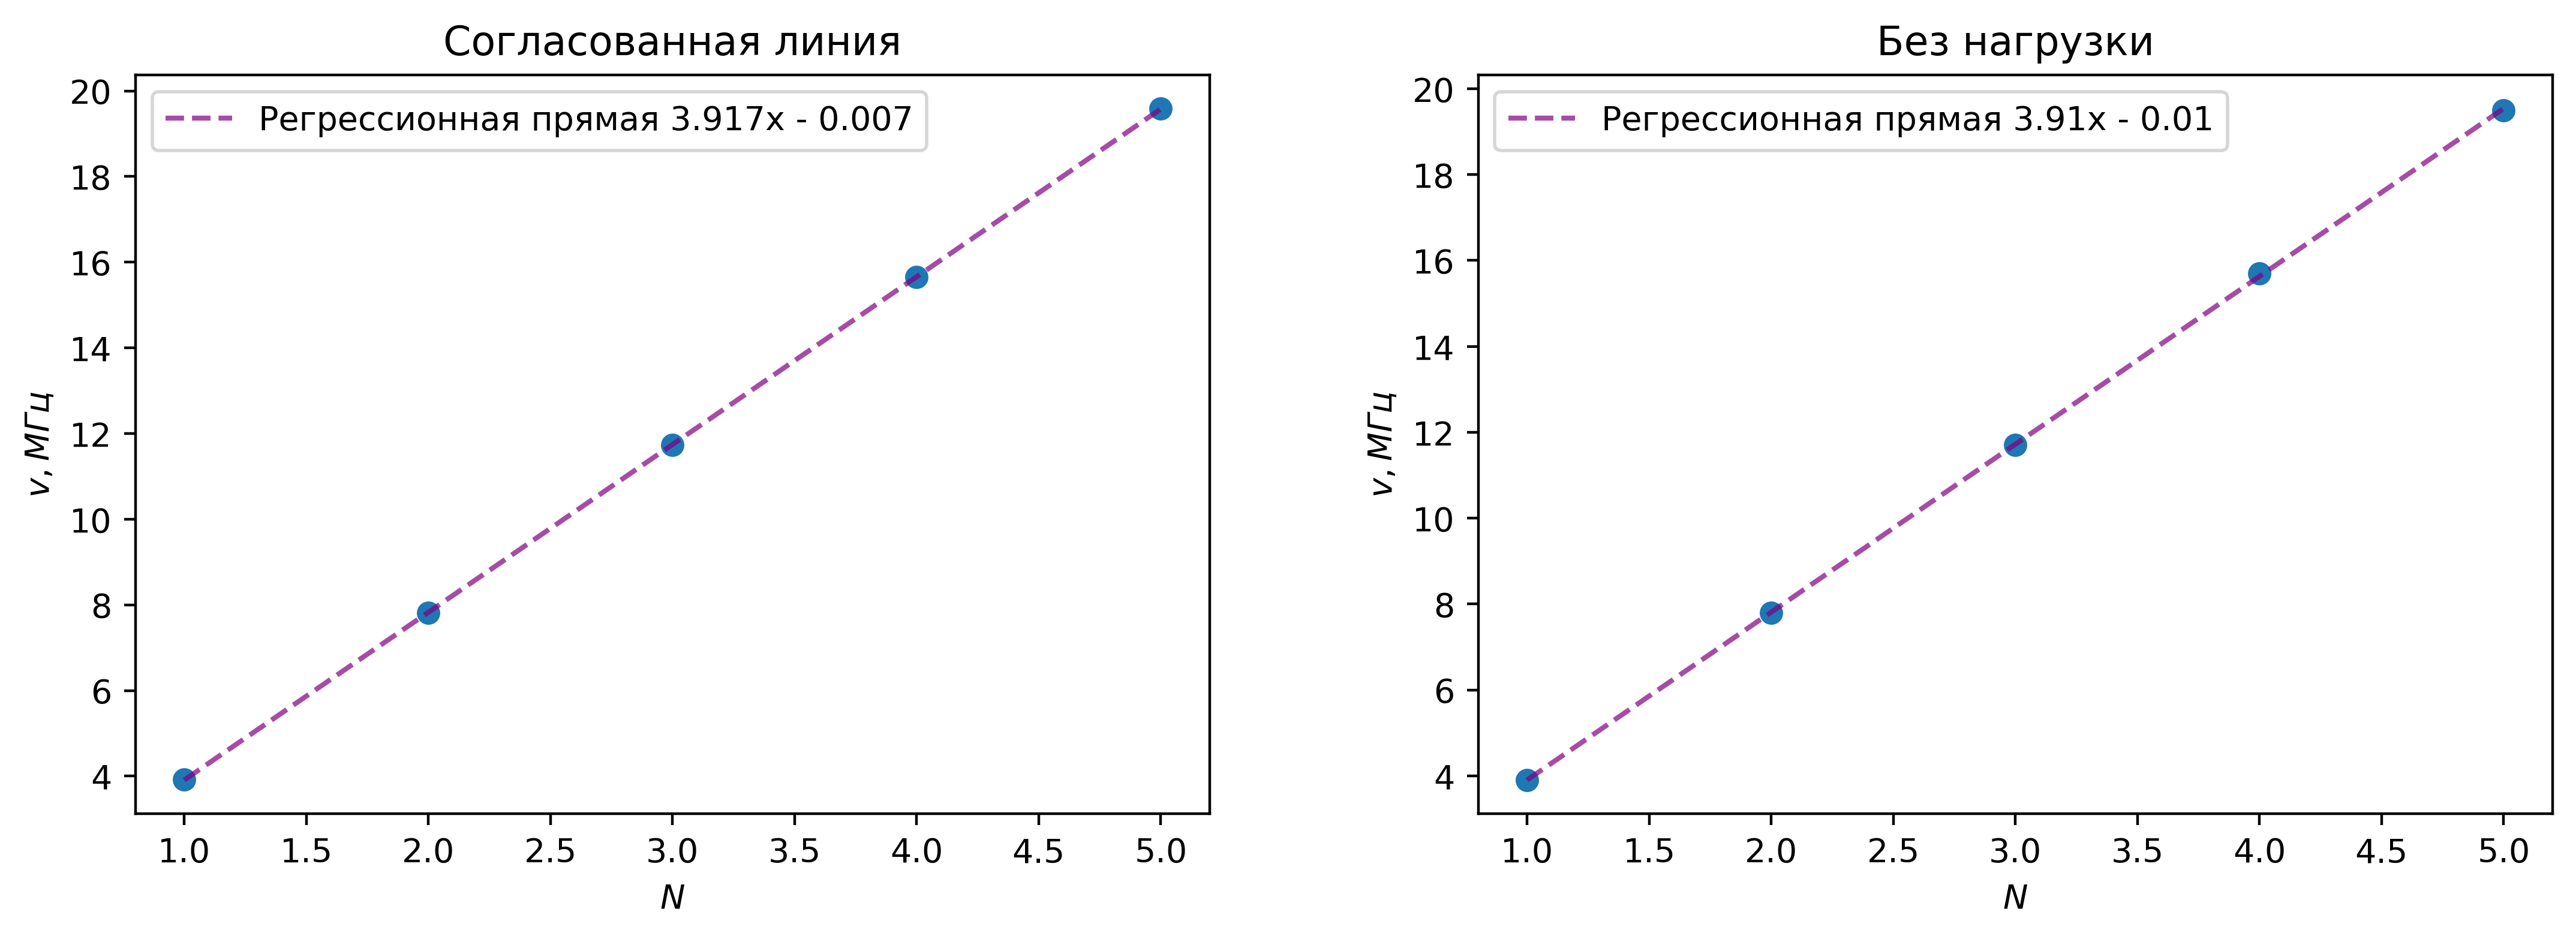

In [190]:
# Создать фигуру и подграфы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), dpi=400)



# построим левый график и пропишем регрессионную прямую с выводом ее формулы на легенду
ax1.scatter(n, v_1)
ax1.set_title('Согласованная линия')

#построим регрессию методом МНК слева
A = np.column_stack((n, np.ones(len(n))))
coefficients, _, _, _ = np.linalg.lstsq(A, v_1, rcond=None)
a, b = coefficients
k1, k2 = a, b
ax1.plot([n.min(), n.max()], [n.min()*a+b, n.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x - {abs(round(b, 3))}')



# построим также правый график
ax2.scatter(n, v_2)
ax2.set_title('Без нагрузки')

#построим регрессию методом МНК справа
A = np.column_stack((n, np.ones(len(n))))
coefficients, _, _, _ = np.linalg.lstsq(A, v_2, rcond=None)
a, b = coefficients
ax2.plot([n.min(), n.max()], [n.min()*a+b, n.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x - {abs(round(b, 3))}')



#побольше отступы сделать между ними
fig.subplots_adjust(wspace=0.25)

# Отобразить графики и применим настройки 
ax1.set_xlabel('$N$')
ax1.set_ylabel('$v, МГц$')
ax2.set_xlabel('$N$')
ax2.set_ylabel('$v, МГц$')

ax1.legend()
ax2.legend()

fig.savefig('plot/fig2.png', bbox_inches='tight')

In [191]:
#посчитаем среднеквадратичную ошибку

v_pred = n*k1 + k2
Delta = (v_1 - v_pred)

Delta.std()

0.009273618495495354

# Часть Б

In [195]:
v = np.array([
    1, 2, 3, 4, 7, 9, 12, 15.5, 19, 22.5, 26, 31, 36, 40
]) # МГц

U_0 = np.array([
    54, 53.9, 53.9, 54, 54, 54, 53.9, 54.1, 54, 53.9, 54, 54, 53.9, 54
])# В
dU_0 = 0.1

U_h = np.array([
    50.8, 49.6, 48.8, 48.4, 46, 45, 43.6, 41.2, 40.8, 39.6, 38.8, 36, 34.2, 33.2
])# В
dU_h = 0.1

varphi = np.array([
    2.87624, 5.57664, 5.12448, 5.19984, 10.06684, 13.33872, 15.61459, 19.70162, 24.7947, 29.87082, 34.94192, 39.61738, 46.36901, 51.42064
])# рад

k = np.array([
    0.57182, 1.10868, 1.01878, 1.03377, 2.00136, 2.65183, 3.10429, 3.91682, 4.92936, 5.93853, 6.9467, 7.87622, 9.21849, 10.22279
])# 10^-3 см^-1

alpha = np.array([
    0.01214, 0.0169, 0.02013, 0.02177, 0.03188, 0.03625, 0.04253, 0.05379, 0.05579, 0.06166, 0.06572, 0.08061, 0.09081, 0.09671
]) # 10^-3 см^-1

In [196]:
y = k**2 - alpha**2
x = 4*(np.pi)**2 * v**2
x /= 10 #для размерностей

y_pred = x * a + b
y_err = abs(y - y_pred)
yerr = max(y_err)

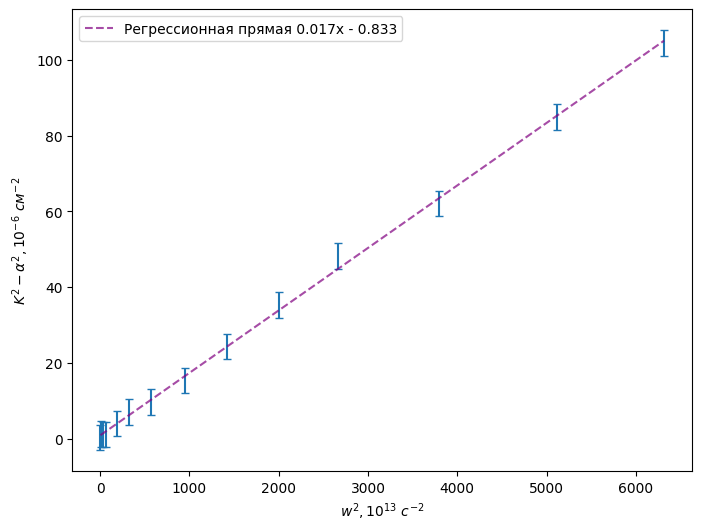

In [197]:
fig = plt.figure(figsize=(8,6))

#построим регрессию методом МНК слева
A = np.column_stack((x, np.ones(len(x))))
coefficients, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
a, b = coefficients


#построим сам график
plt.errorbar(x, y, yerr=yerr, marker='none', linestyle='none', capsize=3)
plt.plot([x.min(), x.max()], [x.min()*a+b, x.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x - {abs(round(b, 3))}')

#настройки графика
plt.legend()
plt.xlabel(r'$w^2, 10^{13}\ с^{-2}$')
plt.ylabel(r'$K^2 - \alpha^2, 10^{-6}\ см^{-2}$')

fig.savefig('plot/fig3.png', bbox_inches='tight')

In [198]:
#посчитаем среднеквадратичную ошибку

v_pred = n*k1 + k2
Delta = (v_1 - v_pred)

Delta.std()

0.009273618495495354

# Часть С

## метод А

In [202]:
v = np.array([
    1, 2, 3, 4, 7, 9, 12, 15.5, 19, 22.5, 26, 31, 36, 40
]) # МГц


alpha = np.array([
    0.01214, 0.0169, 0.02013, 0.02177, 0.03188, 0.03625, 0.04253, 0.05379, 0.05579, 0.06166, 0.06572, 0.08061, 0.09081, 0.09671
]) # 10^-3 см^-1

In [203]:
x = np.sqrt(v*10**6)
y = alpha

y_pred = x * a + b
y_err = abs(y - y_pred)
yerr = max(y_err)

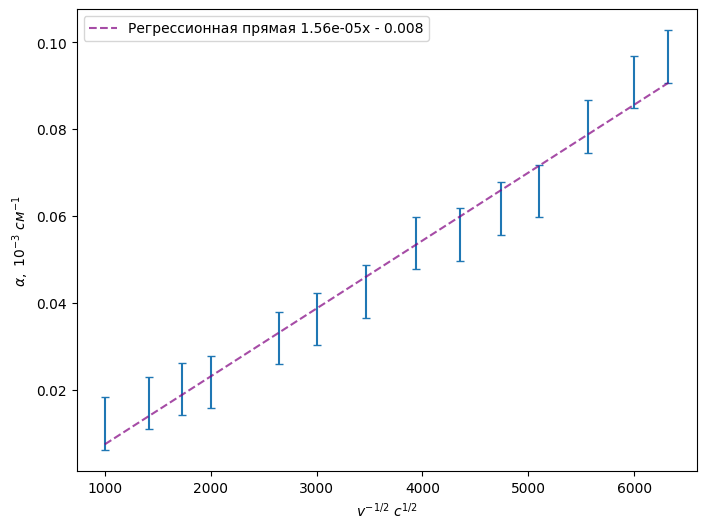

In [204]:
fig = plt.figure(figsize=(8,6))

#построим регрессию методом МНК 
A = np.column_stack((x, np.ones(len(x))))
coefficients, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
a, b = coefficients


#построим сам график
plt.errorbar(x, y, yerr=yerr, marker='none', linestyle='none', capsize=3)
plt.plot([x.min(), x.max()], [x.min()*a+b, x.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 7)}x - {abs(round(b, 3))}')

#настройки графика
plt.legend()
plt.xlabel(r'$v^{-1/2}\ с^{1/2}$')
plt.ylabel(r'$\alpha,\ 10^{-3}\ см^{-1}$')

fig.savefig('plot/fig4.png', bbox_inches='tight')

## метод Б

In [3]:
v = np.array([
    1, 2, 3, 4, 7, 9, 12, 15.5, 19, 22.5, 26, 31, 36, 40
]) # МГц

k = np.array([
    0.57182, 1.10868, 1.01878, 1.03377, 2.00136, 2.65183, 3.10429, 3.91682, 4.92936, 5.93853, 6.9467, 7.87622, 9.21849, 10.22279
])# 10^-3 см^-1

alpha = np.array([
    0.01214, 0.0169, 0.02013, 0.02177, 0.03188, 0.03625, 0.04253, 0.05379, 0.05579, 0.06166, 0.06572, 0.08061, 0.09081, 0.09671
]) # 10^-3 см^-1

In [4]:
x = (v*10**6)**(3/2)
x /= 10**9

y = k*alpha

#первая регрессия
A = np.column_stack((x[0:11], np.ones(len(x[0:11]))))
coefficients, _, _, _ = np.linalg.lstsq(A, y[0:11], rcond=None)
a1, b1 = coefficients
y_pred = x[0:11] * a1 + b1
y_err = abs(y[0:11] - y_pred)
yerr1 = max(y_err)

#вторая регрессия
A = np.column_stack((x[10:], np.ones(len(x[10:]))))
coefficients, _, _, _ = np.linalg.lstsq(A, y[10:], rcond=None)
a2, b2 = coefficients
y_pred = x[10:] * a2 + b2
y_err = abs(y[10:] - y_pred)
yerr2 = max(y_err)

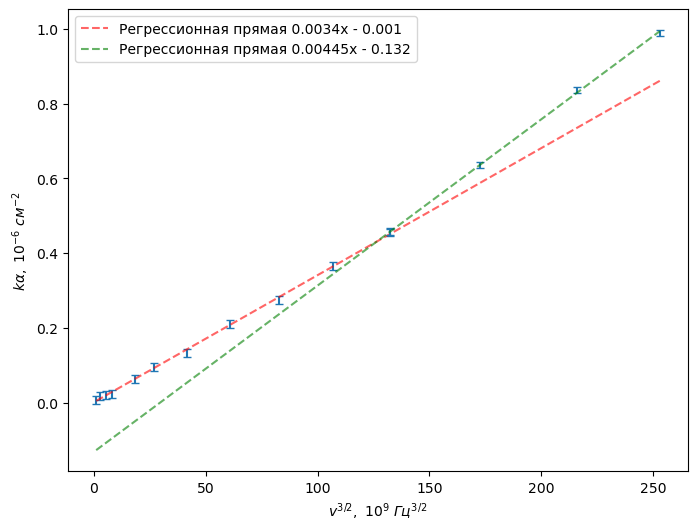

In [5]:
fig = plt.figure(figsize=(8,6))

plt.errorbar(x[0:11], y[0:11], yerr=yerr1, marker='none', linestyle='none', capsize=3, color='#1f77b4')
plt.plot([x[0:11].min(), x.max()], [x[0:11].min()*a1+b1, x.max()*a1+b1], alpha=0.6, linestyle='--', color='red', label=f'Регрессионная прямая {round(a1, 5)}x - {abs(round(b1, 3))}')

plt.errorbar(x[10:], y[10:], yerr=yerr2, marker='none', linestyle='none', capsize=3, color='#1f77b4')
plt.plot([x.min(), x[10:].max()], [x.min()*a2+b2, x[10:].max()*a2+b2], alpha=0.6, linestyle='--', color='green', label=f'Регрессионная прямая {round(a2, 5)}x - {abs(round(b2, 3))}')


#настройки графика
plt.legend()
plt.xlabel(r'$v^{3/2},\ 10^9\ Гц^{3/2}$')
plt.ylabel(r'$k\alpha,\ 10^{-6}\ см^{-2}$')

fig.savefig('plot/fig5.png', bbox_inches='tight')

# Часть Г

In [208]:
v = np.array([
    1, 3, 6, 10, 15, 20, 23, 24, 27, 30, 33
]) # кГц

varphi = np.array([
    6.36, 16.77, 32.21, 50.83, 78.94, 101.2, 118.6, 122.9, 136, 154, 166
])

In [209]:
x = v
y = varphi

#МНК
A = np.column_stack((x, np.ones(len(x))))
coefficients, _, _, _ = np.linalg.lstsq(A, y, rcond=None)
a, b = coefficients

#погрешность по графику
y_pred = x * a + b
y_err = abs(y - y_pred)
yerr = max(y_err)


#посчитаем среднеквадратичную ошибку
y_pred = x*a + b
Delta = (y - y_pred)

Delta.std()

1.1565702131059665

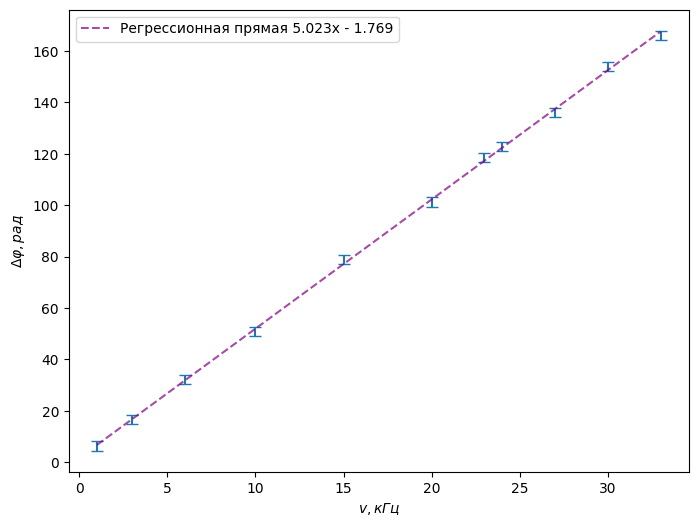

In [210]:
fig = plt.figure(figsize=(8,6))

#построим сам график
plt.errorbar(x, y, yerr=yerr, marker='none', linestyle='none', capsize=4)
plt.plot([x.min(), x.max()], [x.min()*a+b, x.max()*a+b], alpha=0.7, linestyle='--', color='purple', label=f'Регрессионная прямая {round(a, 3)}x - {abs(round(b, 3))}')

#настройки графика
plt.legend()
plt.xlabel(r'$v, кГц$')
plt.ylabel(r'$\Delta \varphi, рад$')

fig.savefig('plot/fig6.png', bbox_inches='tight')

In [211]:
U1 = np.array([
    43,  64.5,  45, 43.3, 42.5, 36, 38
]) #19.2 кГц

U2 = np.array([
    32.7, 66.5, 39, 28, 26, 33, 36
]) #10 кГц

U3  = np.array([
    51.5, 45.6, 37.5,  35, 32.5, 30.5, 29
]) #26.6 кГц

In [212]:
x = np.arange(4, 11)

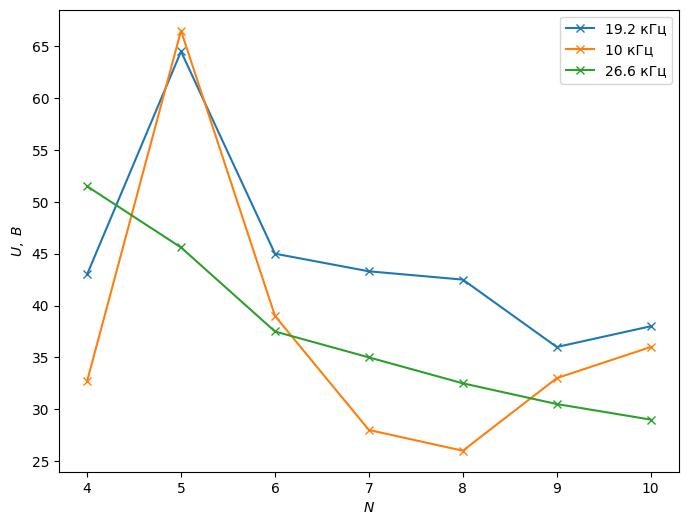

In [213]:
fig = plt.figure(figsize=(8,6))

plt.plot(x, U1, marker='x', label='19.2 кГц')
plt.plot(x, U2, marker='x', label='10 кГц')
plt.plot(x, U3, marker='x', label='26.6 кГц')

plt.legend()
plt.xlabel(r'$N$')
plt.ylabel(r'$U,\ B$')

fig.savefig('plot/fig7.png', bbox_inches='tight')

# АЧХ/ФЧХ

In [4]:
v = np.array([
    1, 2, 3, 4, 7, 9, 12, 15.5, 19, 22.5, 26, 31, 36, 40
]) # МГц

U_0 = np.array([
    54, 53.9, 53.9, 54, 54, 54, 53.9, 54.1, 54, 53.9, 54, 54, 53.9, 54
])# В

U_h = np.array([
    50.8, 49.6, 48.8, 48.4, 46, 45, 43.6, 41.2, 40.8, 39.6, 38.8, 36, 34.2, 33.2
])# В

varphi = np.array([
    2.87624, 5.57664, 5.12448, 5.19984, 10.06684, 13.33872, 15.61459, 19.70162, 24.7947, 29.87082, 34.94192, 39.61738, 46.36901, 51.42064
])# рад

k = np.array([
    0.57182, 1.10868, 1.01878, 1.03377, 2.00136, 2.65183, 3.10429, 3.91682, 4.92936, 5.93853, 6.9467, 7.87622, 9.21849, 10.22279
])# 10^-3 см^-1

alpha = np.array([
    0.01214, 0.0169, 0.02013, 0.02177, 0.03188, 0.03625, 0.04253, 0.05379, 0.05579, 0.06166, 0.06572, 0.08061, 0.09081, 0.09671
]) # 10^-3 см^-1

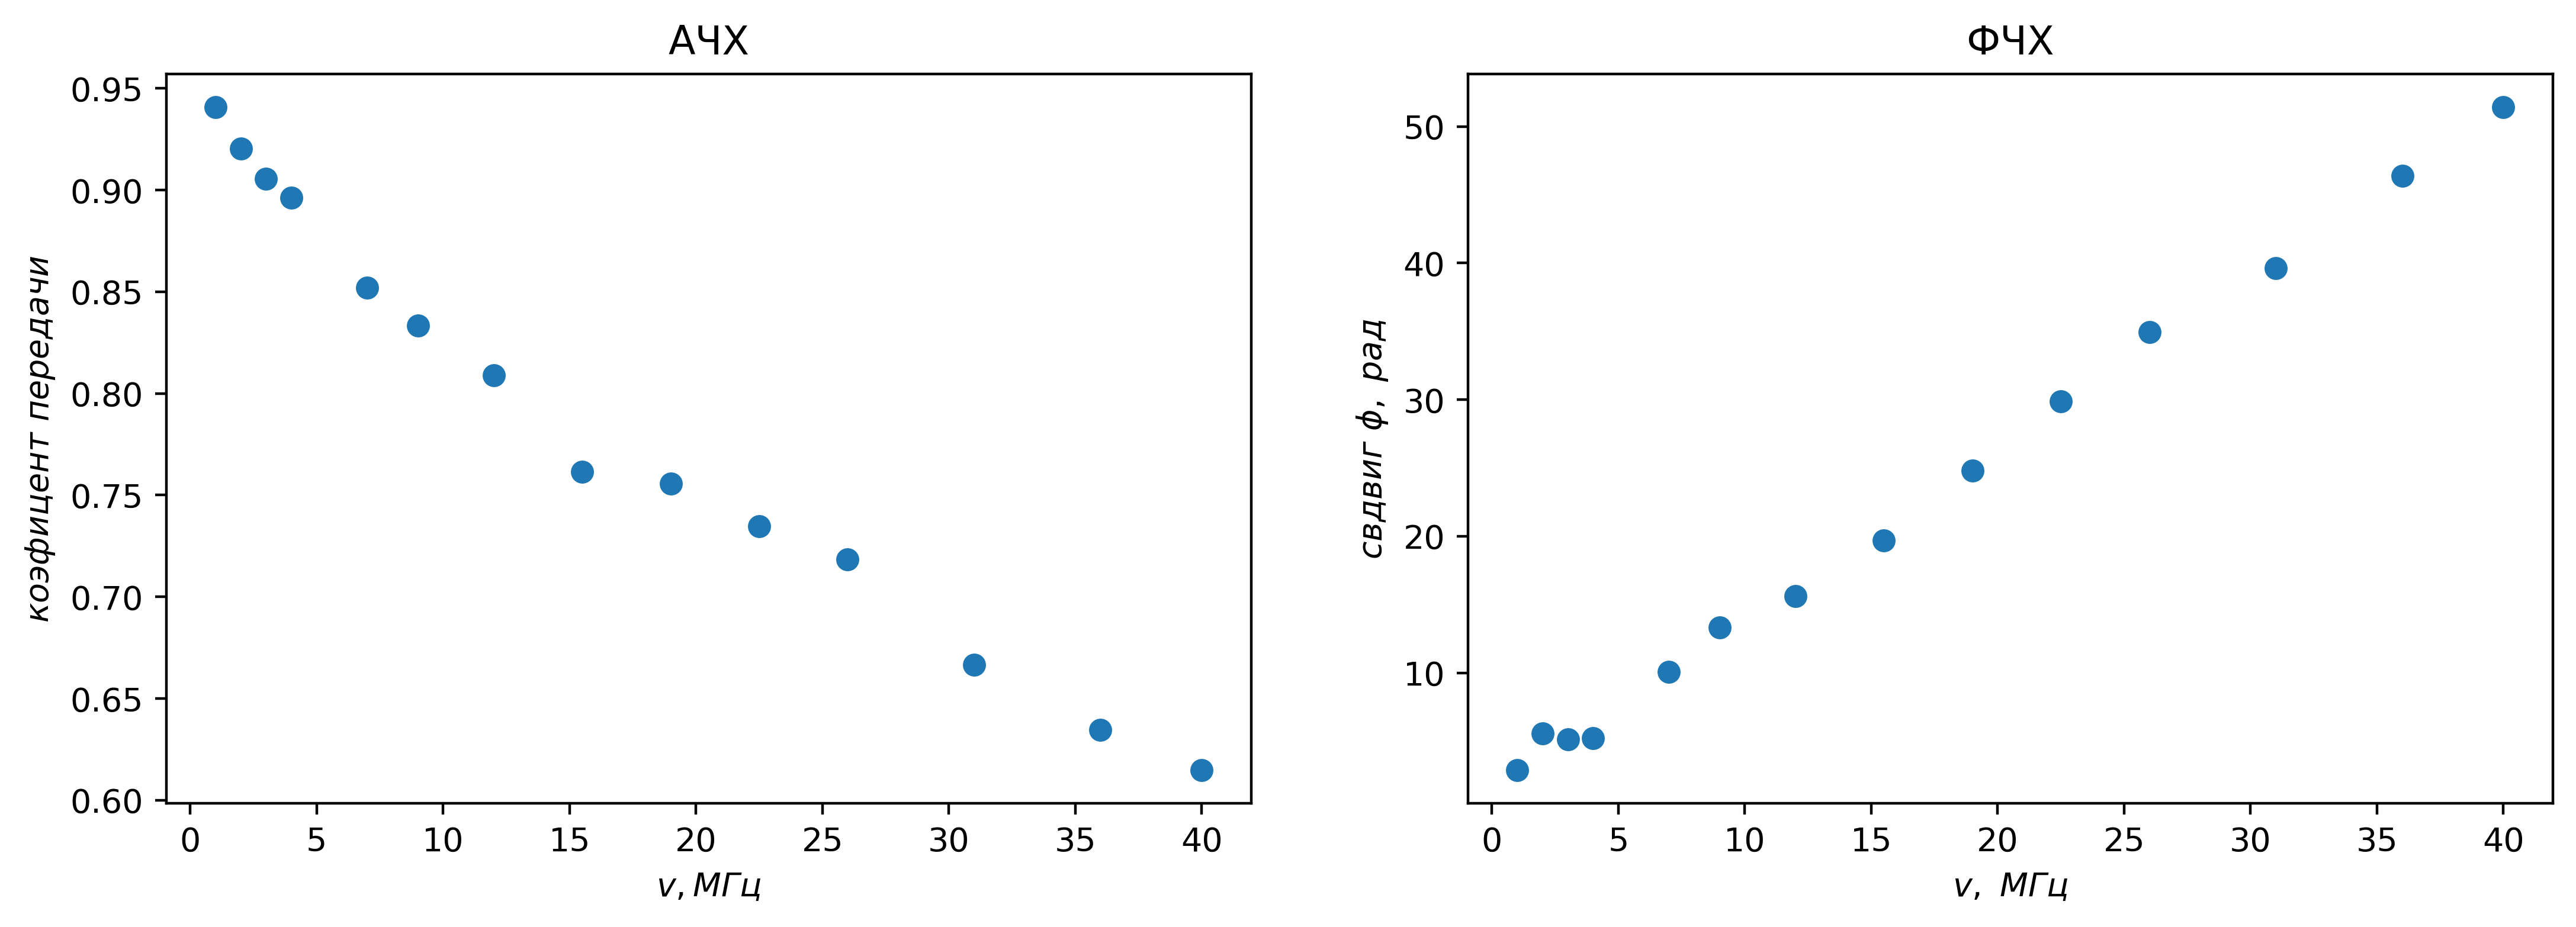

In [9]:
# Создать фигуру и подграфы
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4), dpi=400)

x = v
y = U_h/U_0
ax1.scatter(x, y)
ax1.set_xlabel('$v, МГц$')
ax1.set_ylabel(r'$коэфицент\ передачи$')
ax1.set_title('АЧХ')


x = v
y = varphi
ax2.scatter(x, y)
ax2.set_xlabel(r'$v,\ МГц$')
ax2.set_ylabel(r'$свдвиг\ \phi,\ рад$')
ax2.set_title('ФЧХ')


fig.savefig('plot/fig8.png', bbox_inches='tight')